In [75]:
import pandas as pd
import numpy as np
import seaborn as sn
from  matplotlib import pyplot as plt
import matplotlib
%matplotlib inline


In [76]:
data=pd.read_csv("loan-test.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [77]:
data.shape

(614, 13)

In [78]:
data.size

7982

In [79]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [80]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
data['Gender'].mode()[0]

'Male'

In [82]:
data['Dependents'].mode()[0]

'0'

In [83]:
data['Self_Employed'].mode()[0]

'No'

In [84]:
data["LoanAmount"].mean()

146.41216216216216

In [85]:
data['Loan_Amount_Term'].mean()

342.0

In [86]:
data['Credit_History'].mean()

0.8421985815602837

In [87]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data["Self_Employed"].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])


In [88]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mean())

In [89]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [90]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [91]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [92]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [93]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [94]:
data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [95]:
data.groupby('Gender')["Married"].value_counts()

Gender  Married
Female  No          80
        Yes         32
Male    Yes        369
        No         133
Name: Married, dtype: int64

In [96]:
data.groupby("Dependents")['Married'].value_counts()

Dependents  Married
0           Yes        185
            No         175
1           Yes         79
            No          23
2           Yes         93
            No           8
3+          Yes         44
            No           7
Name: Married, dtype: int64

In [97]:
data.groupby("Education")["Dependents"].value_counts()

Education     Dependents
Graduate      0             286
              1              81
              2              77
              3+             36
Not Graduate  0              74
              2              24
              1              21
              3+             15
Name: Dependents, dtype: int64

In [98]:
data.groupby("Dependents")["LoanAmount"].mean()

Dependents
0     135.995439
1     158.143614
2     150.111252
3+    189.153418
Name: LoanAmount, dtype: float64

In [99]:
data.groupby("Married")["LoanAmount"].mean()

Married
No     129.459555
Yes    155.416914
Name: LoanAmount, dtype: float64

In [100]:
data.groupby("Education")['LoanAmount'].mean()

Education
Graduate        153.821213
Not Graduate    119.872277
Name: LoanAmount, dtype: float64

In [101]:
data.groupby("Credit_History")["LoanAmount"].mean()

Credit_History
0.000000    146.703917
0.842199    160.788243
1.000000    144.844225
Name: LoanAmount, dtype: float64

In [102]:
data.groupby("Self_Employed")["LoanAmount"].mean()

Self_Employed
No     142.612464
Yes    171.063860
Name: LoanAmount, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

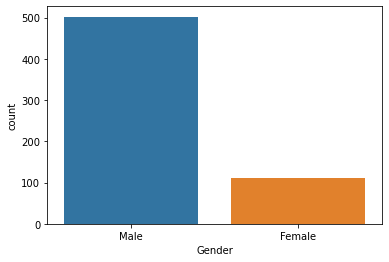

In [103]:
sn.countplot(data['Gender'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

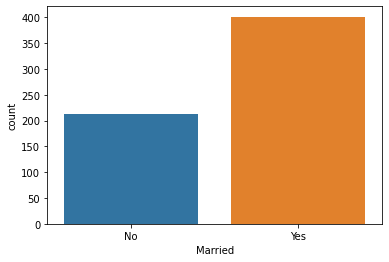

In [104]:
sn.countplot(data['Married'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

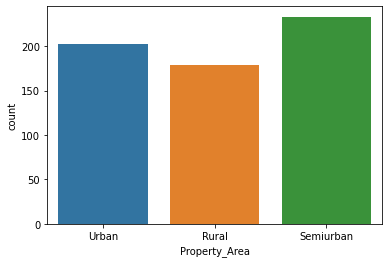

In [105]:
sn.countplot(data['Property_Area'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

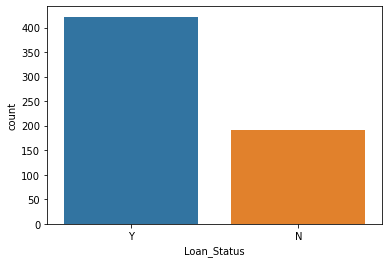

In [106]:
sn.countplot(data['Loan_Status'])

<AxesSubplot:>

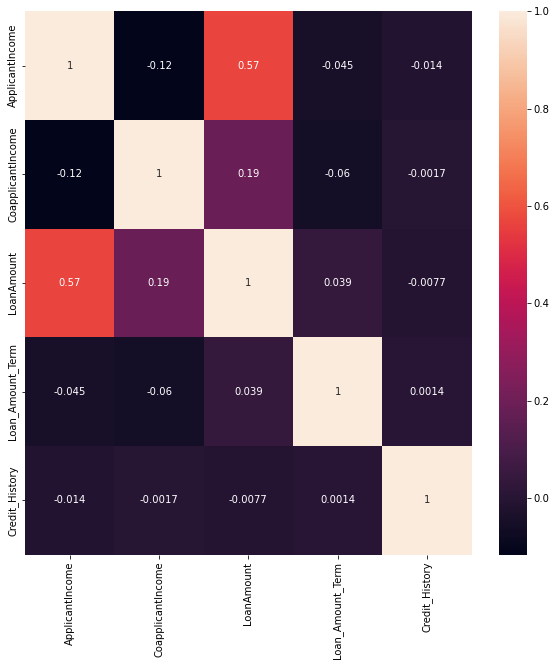

In [107]:
plt.figure(figsize=(10,10))
corr=data.corr()
sn.heatmap(corr,annot=True,)

In [108]:
data.drop('Loan_ID',axis=1,inplace=True)

In [109]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [110]:
from sklearn.preprocessing import LabelEncoder
l=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
label=LabelEncoder()
for i in l:
    data[i]=label.fit_transform(data[i])

In [111]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [112]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [113]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [114]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [115]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=0)


In [116]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()


In [117]:
model.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
print(model.predict([[0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0]]))

[1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
model.score(xtrain,ytrain)*100

79.95337995337995

In [120]:
model.score(xtest,ytest)*100

83.24324324324324

In [121]:
predictresult=model.predict(xtest)

In [122]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(ytest,predictresult)*100)

83.24324324324324


In [123]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [124]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [127]:
model.score(xtrain,ytrain)*100

100.0

In [128]:
model.score(xtest,ytest)*100

75.67567567567568

In [129]:
predictresult=model.predict(xtest)

In [130]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(ytest,predictresult)*100)

75.67567567567568


In [131]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0])

In [132]:
model.score(xtrain,ytrain)*100


80.65268065268066

In [133]:
model.score(xtest,ytest)*100

51.35135135135135

In [134]:
from sklearn.metrics import *

<AxesSubplot:>

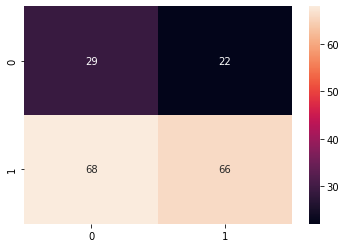

In [135]:
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,predict),annot=True)

In [136]:
import matplotlib.pyplot as plt
l=[]
for i in range(1,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    l.append(model.score(xtest,ytest))

    

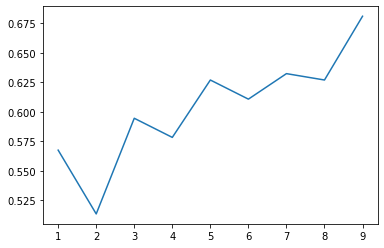

In [137]:
plt.plot(range(1,10),l)

In [138]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
result=model.predict(xtest)

In [139]:
model.score(xtrain,ytrain)*100

79.48717948717949

In [140]:
model.score(xtest,ytest)*100

82.16216216216216

In [141]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,result))

0.8216216216216217


In [142]:
from sklearn.ensemble import RandomForestClassifier 
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
result=model.predict(xtest)

In [143]:
model.score(xtrain,ytrain)*100

100.0

In [144]:
model.score(xtest,ytest)*100

81.08108108108108

In [145]:
print(accuracy_score(ytest,result))

0.8108108108108109


In [146]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
result1=model.predict(xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
model1.score(xtrain,ytrain)*100

79.95337995337995

In [148]:
print(accuracy_score(ytest,result)*100)

81.08108108108108
